In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt


##TASK 1 - Merge 12 months of data into a single CSV file

In [3]:

files = [file for file in os.listdir('/content/drive/MyDrive/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+ file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index= False)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


##CLEAN UP THE DATA

Drop NaN & Or Values

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


##TASK 2 - Add new column for month

In [7]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


##TASK 3-Add a new column for sales

In [8]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


##TASK 4 - Add a City column

In [9]:
all_data['City']= all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle


##Task 5-Add a State column

In [10]:
all_data['State']= all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,ME
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,CA
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City,NY
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,GA
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,WA


##ADD COLUMN FOR TIME OF PURCHASE 

*##Convert Order date from String to Datetime*

In [29]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Purchase Time
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,ME,01:
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,CA,07:
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City,NY,09:
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,GA,16:
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,WA,20:


##Exract hour data from Order date

In [33]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Purchase Time,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,ME,01:,1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,CA,07:,7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City,NY,09:,9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,GA,16:,16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,WA,20:,20,32


##Q1 - Best month for sales and how much was earned?

In [11]:
tm_sales = all_data.groupby('Month').sum()
tm_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


##Q1-Plot (BEST MONTH FOR SALES)

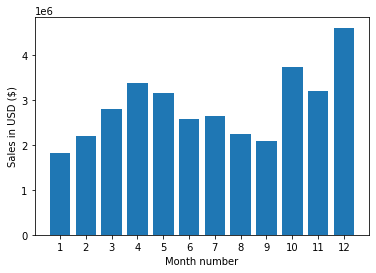

In [12]:
months = range(1,13)
plt.bar(months,tm_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


##Q2- City with the highest number of sales

In [13]:
tm_city = all_data.groupby('City').sum()
tm_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


##Q2 PLOT (CITY WITH HIGHEST SALES)

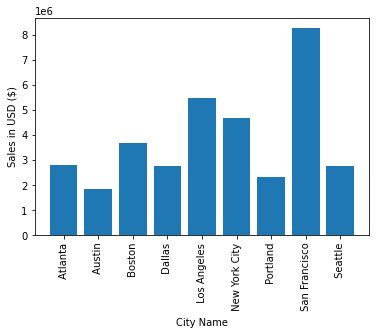

In [91]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,tm_city['Sales'])
plt.xticks(cities,rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

##Q3 -WHAT IS THE MOST OPTIMAL TIME TO ADVERTISE TO MAXIMISE CUSTOMER PURCHASES?

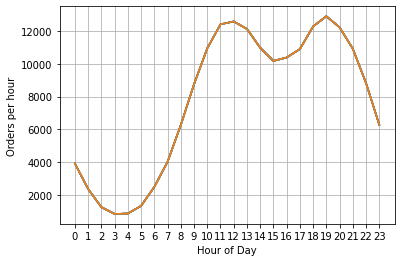

In [46]:
tm_time = [time for time, df in all_data.groupby('Hour')]

plt.plot(tm_time, all_data.groupby(['Hour']).count())
plt.xticks(tm_time)
plt.grid()
plt.ylabel('Orders per hour')
plt.xlabel('Hour of Day')
plt.show()


##Q4 - WHICH PRODUCTS WERE SOLD TOGETHER THE MOST?

##Find duplicate Order IDs

In [60]:
dup_prod = all_data[all_data['Order ID'].duplicated(keep = False)]

dup_prod['Grouped Purchases'] = dup_prod.groupby('Order ID')['Product'].transform(lambda x: '&'. join(x))
dup_prod  = dup_prod[['Order ID','Grouped Purchases']]. drop_duplicates()
dup_prod.head(50)

<ipython-input-60-831ed7f10179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_prod['Grouped Purchases'] = dup_prod.groupby('Order ID')['Product'].transform(lambda x: '&'. join(x))


,Order ID,Grouped Purchases
16,150518,Macbook Pro Laptop&iPhone
82,150582,iPhone&Lightning Charging Cable
91,150590,Apple Airpods Headphones&AAA Batteries (4-pack)
119,150617,Google Phone&USB-C Charging Cable
154,150651,Google Phone&USB-C Charging Cable
180,150674,Google Phone&USB-C Charging Cable&Wired Headph...
196,150688,Google Phone&Wired Headphones
243,150734,Google Phone&USB-C Charging Cable
268,150758,iPhone&Wired Headphones
364,150853,AAA Batteries (4-pack)&27in 4K Gaming Monitor


##COUNT DUPLICATES

In [80]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in dup_prod['Grouped Purchases']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value)



##Which product sold the most? Why do you think it sold the most?

In [88]:
prod_grp = all_data.groupby('Product')
quant= prod_grp.sum()['Quantity Ordered']
quant

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

##Plot for most sold product

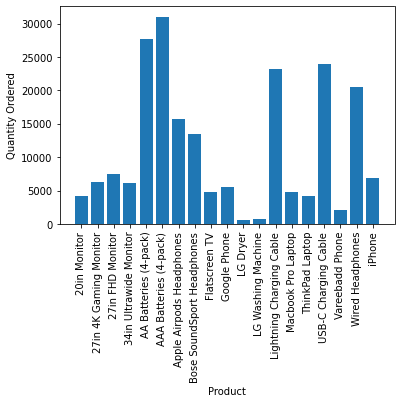

In [97]:
prod= [product for product, df in prod_grp]

plt.bar(prod,quant)
plt.xticks(prod, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

<ipython-input-103-eea109e36ce4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod,rotation='vertical')


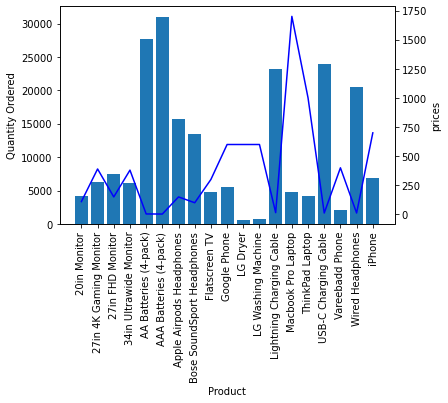

In [103]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod, quant,)
ax2.plot(prod, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('prices')
ax1.set_xticklabels(prod,rotation='vertical')

plt.show()
